# SLU10: Metrics for Classification -- Exercises

In this notebook, we'll practice all the classification metrics you've learned. This is the roadmap:

- Understanding the problem with accuracy
- Understanding FP, TP, FN, TN
- Understanding precision and recall
- Understanding the ROC Curve 
- Understanding AUROC
- Which model is better for a particular circumstance
- Using these metrics in day to day 

In [1]:
import pandas as pd
import math 
import numpy as np
from utils import plot_confusion_matrix, hash_answer
from matplotlib import pyplot as plt 

In [2]:
# Run this cell - we will use this function in the exercises.

def load_data():
    # Loads classifier probabilities dataframe
    df = pd.read_csv("data/classifier_prediction_scores.csv")
    return df

## Useful information

In this notebook, we will work with a dataset with probabilities and class labels like this:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>probas</th>      <th>target</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>0.288467</td>      <td>0</td>    </tr>    <tr>      <th>1</th>      <td>0.255047</td>      <td>1</td>    </tr>    <tr>      <th>2</th>      <td>0.201017</td>      <td>0</td>    </tr>    <tr>      <th>3</th>      <td>0.729307</td>      <td>1</td>    </tr>    <tr>      <th>4</th>      <td>0.148288</td>      <td>0</td>    </tr>  </tbody></table>

For some metrics, we will need to convert the probabilities into predicted class labels by setting a threshold. We will do it using the following function:

In [3]:
# Run this cell, we will use the function in the exercises.

def threshold_probas(proba, threshold=.5): 
    if proba >= threshold:
        return 1
    else: 
        return 0 

## Exercise 1 - Understanding the problem with Accuracy 

In this exercise, you will implement a function to calculate the accuracy from true and predicted class labels. We will then compare the accuracy of predicted class labels for various predictions.

Implement below a function to compute the accuracy from a dataframe with true and predicted class labels:

- the `target` column contains the true labels
- the `prediction` column contains the model prediction for the class labels


In [4]:
def accuracy(df):
    """
        Given a dataframe with `prediction` and `target` columns, 
        compute the accuracy metric
    
    Args:
        df (pd.DataFrame): the dataframe, with `prediction` and `target` columns

    Returns:
        accuracy (float): the accuracy metric    
    """    

    # YOUR CODE HERE
    accuracy = np.sum(df.target==df.prediction)/df.shape[0]
    
    return accuracy


In [5]:
df_1 = pd.DataFrame({"target": np.array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0])})

df_1_all_zeros = df_1.copy()
df_1_all_zeros["prediction"] = 0 
np.testing.assert_almost_equal(accuracy(df_1_all_zeros), 0.4545, 2)

df_1_all_ones = df_1.copy()
df_1_all_ones["prediction"] = 1
np.testing.assert_almost_equal(accuracy(df_1_all_ones), 0.54545, 2)

df_2 = pd.DataFrame({"target": np.array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])})

df_2_all_zeros = df_2.copy()
df_2_all_zeros["prediction"] = 0 
np.testing.assert_almost_equal(accuracy(df_2_all_zeros), 0.2727, 2)

df_2_all_ones = df_2.copy()
df_2_all_ones["prediction"] = 1
np.testing.assert_almost_equal(accuracy(df_2_all_ones), 0.7272, 2)


Let's calculate the accuracy for predictions for a threshold = 0.5:

In [6]:
# run this cell

df = load_data()
df["prediction"] = df['probas'].apply(threshold_probas)
print(f"Accuracy of predictions: {accuracy(df)}")

Accuracy of predictions: 0.8545673076923077


Now let's see what would happen if we just predicted 0 (majority class) or 1 for every data point:

In [7]:
df["prediction"] = 0
print(f"Accuracy of predicting always zero: {accuracy(df)}")


df["prediction"] = 1
print(f"Accuracy of predicting always one: {accuracy(df)}")


Accuracy of predicting always zero: 0.84375
Accuracy of predicting always one: 0.15625


As you see, the accuracy can be misleading. We got nearly the same accuracy for predicting all 0s and for our actual prediction with a threshold of 0.5 (0.84 vs. 0.85). If we optimized our model just for accuracy, we could end up with a model that just predicts all zero values. Let's move on to other metrics from the learning notebook.

We'll start with the confusion matrix and the insights it gives us.

## Exercise 2: Understanding metrics at a particular threshold 

We'll now look into confusion matrices. For this purpose we'll use a threshold of 0.3 and plot the confusion matrix. You will then use the numbers in the confusion matrix to calculate the true and false positives and negatives.

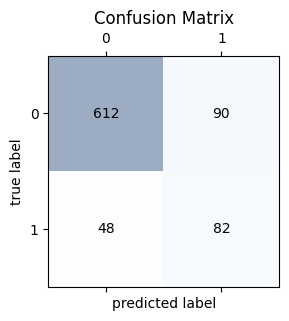

In [8]:
# run this cell to calculate predictions for threshold = 0.3 and plot the corresponding confusion matrix

df = load_data()
df["prediction"] = df['probas'].apply(lambda prob: threshold_probas(prob, threshold=0.3))

plot_confusion_matrix(df["target"], df["prediction"])

### 2.1 FP, TP, FN, TN
Identify the following parameters for this confusion matrix and fill in the answers in the cell below:

- False Positives    (FP)
- True Positives     (TP)
- False Negatives    (FN)
- True Negatives     (TN)

In [12]:
# true_positives
TP = 82
# true_negatives 
TN = 612
# false_positives
FP = 90
# false_negatives
FN = 48


In [13]:
assert hash_answer(TP) == 'a46e37632fa6ca51a13fe39a567b3c23b28c2f47d8af6be9bd63e030e214ba38'
assert hash_answer(TN) == '55f0124bb79f5c53d868ca45bbb0f4d04da15eea4fb29c6b95087fe8801bf0a3' 
assert hash_answer(FP) == '69f59c273b6e669ac32a6dd5e1b2cb63333d8b004f9696447aee2d422ce63763'
assert hash_answer(FN) == '98010bd9270f9b100b6214a21754fd33bdc8d41b2bc9f9dd16ff54d3c34ffd71'

Great job! We'll now use these parameters to compute more metrics. Implement below a function for each of these metrics: 

- False Positive Rate  (FPR)
- True Positive Rate (TPR)
- Precision
- Recall

Note that all functions take the same arguments although some of them might be superfluous in each case.

### 2.2 False Positive Rate

In [14]:
def false_positive_rate(TP, TN, FP, FN):
    """
    Given the true positives, true negatives, false positives, and false negatives
    compute the false positive rate
    
    Args:
        TP (int): number of true positives     
        TN (int): number of true negatives     
        FP (int): number of false positives     
        FN (int): number of false positives     


    Returns:
        false_positive_rate (float): false positive rate     
    """    

    # false_positive_rate = ...  (a.k.a False Alarm Rate)
    # YOUR CODE HERE
    false_positive_rate = FP/(TN+FP)
    return false_positive_rate

In [15]:
np.testing.assert_almost_equal(false_positive_rate(10, 40, 13, 42), 0.2452, 2)
np.testing.assert_almost_equal(false_positive_rate(24, 42, 4, 64), 0.0869, 2)
np.testing.assert_almost_equal(false_positive_rate(64, 26, 64, 15), 0.7111, 2)
np.testing.assert_almost_equal(false_positive_rate(17, 15, 1, 3), 0.0625, 2)

### 2.3 True Positive Rate

In [16]:
def true_positive_rate(TP, TN, FP, FN):
    """
    Given the true positives, true negatives, false positives, and false negatives
    compute the true positive rate
    
    Args:
        TP (int): number of true positives     
        TN (int): number of true negatives     
        FP (int): number of false positives     
        FN (int): number of false positives     


    Returns:
        true_positive_rate (float): true positive rate     
    """    

    # true_positive_rate = ... 
    # YOUR CODE HERE
    true_positive_rate = TP/(TP+FN)
    return true_positive_rate

In [17]:
np.testing.assert_almost_equal(true_positive_rate(10, 40, 13, 42), 0.1923, 2)
np.testing.assert_almost_equal(true_positive_rate(24, 42, 4, 64), 0.2727, 2)
np.testing.assert_almost_equal(true_positive_rate(64, 26, 64, 15), 0.8101, 2)
np.testing.assert_almost_equal(true_positive_rate(17, 15, 1, 3), 0.8500, 2)    

### 2.4 Precision

In [18]:
def precision_metric(TP, TN, FP, FN):
    """
    Given the true positives, true negatives, false positives, and falsenegatives
    compute the precision
    
    Args:
        TP (int): number of true positives     
        TN (int): number of true negatives     
        FP (int): number of false positives     
        FN (int): number of false positives     


    Returns:
        precision (float): precision score     
    """    
    # precision = ...
    # YOUR CODE HERE
    precision = TP/(TP+FP)
    return precision

In [19]:
np.testing.assert_almost_equal(precision_metric(10, 40, 13, 42), 0.4348, 2)
np.testing.assert_almost_equal(precision_metric(24, 42, 4, 64), 0.8571, 2)
np.testing.assert_almost_equal(precision_metric(64, 26, 64, 15), 0.5000, 2)
np.testing.assert_almost_equal(precision_metric(17, 15, 1, 3), 0.94444, 2)    

### 2.5 Recall

In [20]:
def recall_metric(TP, TN, FP, FN):
    """
    Given the true positives, true negatives, false positives, and false negatives
    compute the recall
    
    Args:
        TP (int): number of true positives     
        TN (int): number of true negatives     
        FP (int): number of false positives     
        FN (int): number of false positives     


    Returns:
        recall (float): recall score     
    """    
    # recall = ...
    # YOUR CODE HERE
    recall = TP/(TP+FN)
    return recall

In [21]:
np.testing.assert_almost_equal(recall_metric(10, 40, 13, 42), 0.1923, 2)
np.testing.assert_almost_equal(recall_metric(24, 42, 4, 64), 0.2727, 2)
np.testing.assert_almost_equal(recall_metric(64, 26, 64, 15), 0.8101, 2)
np.testing.assert_almost_equal(recall_metric(17, 15, 1, 3), 0.8500, 2)    

Finally, let's apply our metrics to the dataframe we had. We'll compute these for the threshold of 0.3, which corresponds to the confusion matrix presented above.

In [22]:
FPR = false_positive_rate(TP, TN, FP, FN)
TPR = true_positive_rate(TP, TN, FP, FN)
precision = precision_metric(TP, TN, FP, FN)
recall = recall_metric(TP, TN, FP, FN)

print('True Positives:       %0.0f' % TP)
print('True Negatives:       %0.0f' % TN)
print('False Positives:      %0.0f' % FP)
print('False Negatives:      %0.0f' % FN)
print('False Positive Rate:  %0.2f' % FPR)
print('True Positive Rate:   %0.2f' % TPR)
print('precision:            %0.2f' % precision)
print('recall:               %0.2f' % recall)


True Positives:       82
True Negatives:       612
False Positives:      90
False Negatives:      48
False Positive Rate:  0.13
True Positive Rate:   0.63
precision:            0.48
recall:               0.63


_Note: your `True Positive Rate` and `Recall` should be the same because... ehm... check their formula!_

## Exercise 3: model selection 

Consider the following two confusion matrixes: 

<img src="media/conf_mats.png" alt="drawing" width="600"/> 

Which model (A or B) is better if they represent the performance of a judge over their career? 
In this situation: 
- 1 is guilty
- 0 is innocent 
- predicting 1 sends people to jail
- predicting 0 sends people home free


In [23]:
# best_option_for_a_judge = ... ("A" or "B")
# YOUR CODE HERE
best_option_for_a_judge = "A"

Which option (A or B) is best, if this is a model for cancer screening? 
In this situation: 
- 1 is cancer
- 0 is healthy
- predicting 1 sends people to a cancer screening
- predicting 0 sends people home 

In [24]:
# best_option_for_cancer_screening = ... ("A" or "B")
# YOUR CODE HERE
best_option_for_cancer_screening ="B"

In [25]:
assert hash_answer(best_option_for_cancer_screening.lower()) == '3e23e8160039594a33894f6564e1b1348bbd7a0088d42c4acb73eeaed59c009d' 
assert hash_answer(best_option_for_a_judge.lower()) == 'ca978112ca1bbdcafac231b39a23dc4da786eff8147c4e72b9807785afee48bb'

## Exercise 4: Understanding the ROC Curve 

In this exercise, you will calculate the ROC curve step-by-step. You get the first two functions for free and you need to implement the rest.

In [26]:
# functions for free

def threshold_probas(proba, threshold): 
    """
    Returns the prediction for a single observation based on a threshold
    
    Args:
        proba (float): a scores or probability, between 0.0 and 1.0
        threshold (float): a number between 0.0 and 1.0    
    
    Returns:
        the prediction: 1 or 0
    """ 
    if proba >= threshold:
        return 1
    else: 
        return 0 
    
def get_predictions(probas, threshold):
    """
    Returns the predictions for a series of observations
    
    Args:
        probas (pd.Series): a series of floats (scores or probabilities) between 0.0 and 1.0
        threshold (float): a number between 0.0 and 1.0    
    Returns:
        predictions (pd.Series): a series of 1s and 0s 
    """
    return probas.apply(lambda x: threshold_probas(x, threshold))

### 4.1. Confusion Matrix Elements 
A second take on the confusion matrix. Write a function that calculates all elements of the Confusion Matrix (TP, FP, TN, FN) from a dataset of true and predicted class labels.

In [34]:
def compute_confusion_matrix(predictions, target):
    """
    Calculates all the elements of the confusion matrix
    
    Args:
        predictions (pd.Series): a series of ints, either 0s or 1s, with predictions
        target (pd.Series): a series of ints, either 0s or 1s, with observed outcomes 
    
    Returns:
        true_positives, true_negatives, false_positives, false_negatives (int):
                                                    elements of the confusion matrix
    """
    
    # it should take ~2 lines to calculate each measure
    # YOUR CODE HERE
    predictions = np.array(predictions)
    target = np.array(target)
    
    # True Positives (TP): Predictions and target both are 1
    true_positives = sum((predictions == 1) & (target == 1))

    # True Negatives (TN): Predictions and target both are 0
    true_negatives = sum((predictions == 0) & (target == 0))

    # False Positives (FP): Predictions are 1, but target is 0
    false_positives = sum((predictions == 1) & (target == 0))

    # False Negatives (FN): Predictions are 0, but target is 1
    false_negatives = sum((predictions == 0) & (target == 1))
    
    return true_positives, true_negatives, false_positives, false_negatives

In [35]:
df = load_data()
threshold_for_testing = 0.6
predictions = get_predictions(df['probas'], threshold_for_testing)
tp, tn, fp, fn = compute_confusion_matrix(predictions, df.target)

assert hash_answer(tp) == '4a44dc15364204a80fe80e9039455cc1608281820fe2b24f1e5233ade6af1dd5'
assert hash_answer(fp) == 'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d'
assert hash_answer(tn) == 'd6723fa996ced47773f2dea29cce9b11f951e6dafe321a84ac7d32791c3b4660'
assert hash_answer(fn) == '2abaca4911e68fa9bfbf3482ee797fd5b9045b841fdff7253557c5fe15de6477'

### 4.2. True/False Positives Rates
Write a function that calculates the True Positives Rate and the False Positives Rate from the true and predicted class labels. You can use the functions you have implemented above.

In [36]:
def calculate_true_and_false_positives_rate(predictions, target):
    """
    Calculates the true and false positives rate
    
    Args:
        predictions (pd.Series): a series of ints, either 0s or 1s, with predictions
        target (pd.Series): a series of ints, either 0s or 1s, with observed outcomes 
    
    Returns:
        true_positives_rate, false_positives_rate (float): true and false positives rate
    """   
    # YOUR CODE HERE
    # Compute confusion matrix elements
    TP, TN, FP, FN = compute_confusion_matrix(predictions, target)

    # Calculate True Positives Rate (TPR)
    true_positives_rate = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate False Positives Rate (FPR)
    false_positives_rate = FP / (FP + TN) if (FP + TN) != 0 else 0

    return true_positives_rate, false_positives_rate


In [37]:
df = load_data()
threshold_for_testing = 0.6
predictions = get_predictions(df['probas'], threshold_for_testing)
tpr, fpr = calculate_true_and_false_positives_rate(predictions, df['target'])

assert hash_answer(round(tpr, 4)) == '918ae0d325e428351045f50747561dd25451e3866462a38c0e62ec2913fdd1a5'
assert hash_answer(round(fpr, 4)) == '4c158422ed9316829516c182728418409140930df77cf52b47ea03cb59bfd2a3'

### 4.3. ROC Curve
Now you have all the functions that help you to calculate the ROC curve. Implement a function that calculates the true and false positives rates for a list of thresholds. The function should return two dictionaries, for the true/false positives rate, where the keys are the thresholds and the values are the calculated true/false positives rates.

In [38]:
def hand_made_roc_curve(probas, target, list_of_thresholds):
    """
    Calculates the true and false positives rates for the given thresholds.
    
    Args:
        probas (float): a list of probabilities for some observations, between 0.0 and 1.0
        target (int): a list of true class labels for the same observations, 0s and 1s
        list_of_thresholds (float): a list of thresholds for which to calculate the true
                                    and false positive rate
    Returns:
        TPRs, FPRSs: dictionaries with true and false positives rates for each threshold,
                     keys - thresholds, values - corresponding tpr/fpr
        
    """
    
    TPRs = {}
    FPRs = {}
    
    # for each threshold, get the predictions and calculate the TPR and FPR
    # you already defined everything above, so each line should be just a function call   
    # YOUR CODE HERE

    for threshold in list_of_thresholds:
        # Convert probabilities to binary predictions based on the threshold
        predictions = [1 if prob >= threshold else 0 for prob in probas]

        # Calculate TPR and FPR
        tpr, fpr = calculate_true_and_false_positives_rate(predictions, target)

        # Store TPR and FPR for the current threshold
        TPRs[threshold] = tpr
        FPRs[threshold] = fpr
    
    return TPRs, FPRs

In [39]:
#probas = [0.1, 0.4, 0.6, 0.8, 0.9]  # Sample probabilities
#target = [0, 0, 1, 1, 1]             # Corresponding true labels
#list_of_thresholds = [0.2, 0.5, 0.7] # Thresholds to check
#TPRs, FPRs = hand_made_roc_curve(probas, target, list_of_thresholds)

In [40]:
df = load_data()
list_of_thresholds = np.linspace(0, 10) ** 2 / 100

hand_made_tpr, hand_made_fpr = hand_made_roc_curve(df['probas'], df['target'], list_of_thresholds)

assert isinstance(hand_made_tpr, dict), "TPRs is not a dictionary"
assert isinstance(hand_made_fpr, dict), "FPRs is not a dictionary"

assert sum(list(hand_made_tpr.keys())== list_of_thresholds) == len(list_of_thresholds), 'The keys of the TPR dictionary are not correct'
assert sum(list(hand_made_fpr.keys())== list_of_thresholds) == len(list_of_thresholds), 'The keys of the FPR dictionary are not correct'

tpr_array = np.array(list(hand_made_tpr.values()))
fpr_array = np.array(list(hand_made_fpr.values()))

np.testing.assert_almost_equal(tpr_array.mean(), 0.56, 2, err_msg='The values of the TPR dictionary are not correct.')
np.testing.assert_almost_equal(tpr_array.var(), 0.14, 2, err_msg='The values of the TPR dictionary are not correct.')
np.testing.assert_almost_equal(tpr_array.min(), 0., 2, err_msg='The values of the TPR dictionary are not correct.')
np.testing.assert_almost_equal(tpr_array.max(), 1., 2, err_msg='The values of the TPR dictionary are not correct.')

np.testing.assert_almost_equal(fpr_array.mean(), 0.29, 2, err_msg='The values of the FPR dictionary are not correct.')
np.testing.assert_almost_equal(fpr_array.var(), 0.10, 2, err_msg='The values of the FPR dictionary are not correct.')
np.testing.assert_almost_equal(fpr_array.min(), 0.0, 1, err_msg='The values of the FPR dictionary are not correct.')
np.testing.assert_almost_equal(fpr_array.max(), 1.0, 1, err_msg='The values of the FPR dictionary are not correct.')

Finally, the fruits of your labor. We will plot an ROC curve calculated with your function:

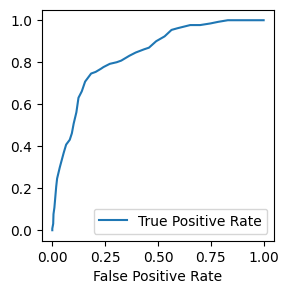

,False Positive Rate,True Positive Rate
Thresholds,,
0.041649,0.591168,0.961538
0.050396,0.564103,0.953846
0.059975,0.531339,0.923077
0.070387,0.491453,0.900000
0.081633,0.457265,0.869231
0.093711,0.434473,0.861538
0.106622,0.394587,0.846154
0.120367,0.364672,0.830769
0.134944,0.326211,0.807692


In [41]:
df = load_data()

# generating a space of thresholds (we'll be more "dense" near zero)
list_of_thresholds = np.linspace(0, 10) ** 2 / 100

# using the function you have just created 
hand_made_tpr, hand_made_fpr = hand_made_roc_curve(df['probas'], df['target'], list_of_thresholds)

# just making a dataframe to pretty things up
hand_made_roc_df = pd.DataFrame({'False Positive Rate': hand_made_fpr, 
                        'True Positive Rate': hand_made_tpr})

# naming the index
hand_made_roc_df.index.name = 'Thresholds'

# plotting the ROC curve 
hand_made_roc_df.set_index('False Positive Rate').plot();
plt.show()

# displaying the ROC curve data
display(hand_made_roc_df.iloc[10:20])

## Exercise 5: The joy of scikit 
Ok, you earned it - you get to use scikit now ! :)

Run the cell below to load the data and create predicted class labels.

In [42]:
# Run this cell

df = load_data()

df['prediction'] = get_predictions(df['probas'], threshold=.3)
df.head()

,target,probas,prediction
0,0,0.000011,0
1,0,0.000860,0
2,0,0.022122,0
3,0,0.216413,0
4,0,0.118217,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   target      832 non-null    int64  
 1   probas      832 non-null    float64
 2   prediction  832 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 19.6 KB


### 5.1. Scikit Accuracy/Precision/Recall
Implement a function to calculate the accuracy, precision, and recall with sklearn. Don't forget to import the necessary functions! And don't confuse the inputs. :) 

In [44]:
def accuracy_precision_recall_sklearn(predictions, target):
    """
    Given the predicted and true labels, return the accuracy, precision,
    and recall using sklearn
    
    Args:
        predictions (pd.Series or np.array): classifier class predictions
        target (pd.Series or np.array): true labels     

    Returns:
        accuracy, precision, recall (float): metrics calculated with sklearn
    """    
    # NOTE: Even though this is not a good programming practice, just 
    #       for the sake of the exercise, ensure you import the right 
    #       functions within this code:
    # from ...
    # YOUR CODE HERE
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    
    # Calculate accuracy
    accuracy = accuracy_score(target, predictions)

    # Calculate precision
    precision = precision_score(target, predictions)

    # Calculate recall
    recall = recall_score(target, predictions)
    
    return accuracy, precision, recall

In [45]:
df = load_data()
df['prediction'] = get_predictions(df['probas'], threshold=.3)

df_1 = df.iloc[100:200].copy()
accuracy, precision, recall = accuracy_precision_recall_sklearn(df_1['prediction'], df_1['target'])
np.testing.assert_almost_equal(accuracy, 0.83, 2, err_msg="The accuracy is not correct.")
np.testing.assert_almost_equal(precision, 0.5714, 2, err_msg="The precision is not correct.")
np.testing.assert_almost_equal(recall, 0.7619, 2, err_msg="The recall is not correct.")

df_2 = df.iloc[0:50].copy()
accuracy, precision, recall = accuracy_precision_recall_sklearn(df_2['prediction'], df_2['target'])
np.testing.assert_almost_equal(accuracy, 0.86, 2, err_msg="The accuracy is not correct.")
np.testing.assert_almost_equal(precision, 0.5, 2, err_msg="The precision is not correct.")
np.testing.assert_almost_equal(recall, 0.5714, 2, err_msg="The recall is not correct.")


Let's check the metrics for the full dataset:

In [46]:
df = load_data()
df['prediction'] = get_predictions(df['probas'], threshold=.3)
accuracy, precision, recall = accuracy_precision_recall_sklearn(df['prediction'], df['target'])
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8341346153846154
Precision: 0.47674418604651164
Recall: 0.6307692307692307


Notice the great accuracy (which, as we know, is just trying to delude us), but not so great precision and OKish recall.

Next level - confusion matrix with sklearn.

### 5.2. Scikit Confusion Matrix
Implement a function that return the confusion matrix for the given true and predicted class labels. Use sklearn and don't forget to import. Don't confuse the function inputs!

In [47]:
def confusion_matrix_sklearn(predictions, target):
    """
    Given the predicted and true labels, return the confusion
    matrix using scikit-learn
    
    Args:
        predictions (pd.Series or np.array): classifier predictions     
        target (pd.Series or np.array): true labels     

    Returns:
        conf_mat: confusion_matrix
    """    
    # from ? import ...
    # conf_mat = ...
    # YOUR CODE HERE
    from sklearn.metrics import confusion_matrix
    # Calculate the confusion matrix
    conf_mat = confusion_matrix(target, predictions)

    return conf_mat

In [48]:
df = load_data()
df['prediction'] = get_predictions(df['probas'], threshold=.3)

df_1 = df.iloc[100:200].copy()

np.testing.assert_array_almost_equal(
    confusion_matrix_sklearn(df_1['prediction'], df_1['target']), 
    [[67, 12], [5,  16]], 
    2
)

df_2 = df.iloc[0:50].copy()

np.testing.assert_array_almost_equal(
    confusion_matrix_sklearn(df_2['prediction'], df_2['target']), 
    [[39, 4], [3, 4]], 
    2
)

And we can check the matrix for the full dataset:

In [49]:
df = load_data()
df['prediction'] = get_predictions(df['probas'], threshold=.3)

print(f"Confusion matrix:\n {confusion_matrix_sklearn(df['prediction'], df['target'])}")
print("Meaning:\n [[TP   FN]\n [ FP  TN]]")

Confusion matrix:
 [[612  90]
 [ 48  82]]
Meaning:
 [[TP   FN]
 [ FP  TN]]


We're pretty good in identifying positives, but quite bad in detecting negatives.

### 5.3. Scikit ROC Curve
Write a function which calculates the ROC curve and AUROC score using sklearn. The function should return the list of false positives rates, true positives rates, and the thresholds, and the AUROC score. As usual, don't forget the imports and don't confuse the inputs.

In [50]:
def get_roc_sklearn(probas, target):
    """
    Given the predicted probabilities (probas) and true labels, 
    return the information regarding the roc curve - false positives rate,
    true positives rate and thresholds - and the area under the curve
    
    Args:
        probas (pd.Series or np.array): classifier probabilities     
        target (pd.Series or np.array): true labels     

    Returns:
        fpr: false positives rates array for roc curve
        tpr: true positives rates array for roc curve
        thresholds: thresholds array for roc curve
        roc_auc: roc area under the curve

    """    

    # from ? import ... 
    # YOUR CODE HERE
    from sklearn.metrics import roc_curve, roc_auc_score
    
    # Calculate false positives rate, true positives rate and thresholds
    fpr, tpr, thresholds = roc_curve(target, probas)

    # Calculate the area under the ROC curve
    roc_auc = roc_auc_score(target, probas)    
    
    return fpr, tpr, thresholds, roc_auc


In [51]:
df = load_data()
df['prediction'] = get_predictions(df['probas'], threshold=.3)

df_1 = df.iloc[100:200].copy()
fpr_1, tpr_1, thresholds_1, roc_auc_1 = get_roc_sklearn(df_1['probas'], df_1['target'])

np.testing.assert_array_almost_equal(fpr_1[3:6], [0.013, 0.013, 0.025], 3)
np.testing.assert_array_almost_equal(tpr_1[6:8], [0.333, 0.333], 3)
np.testing.assert_array_almost_equal(thresholds_1[7:10], [0.502, 0.498, 0.477], 3)
np.testing.assert_almost_equal(roc_auc_1, 0.86197, 2)

df_2 = df.iloc[0:50].copy()
fpr_2, tpr_2, thresholds_2, roc_auc_2 = get_roc_sklearn(df_2['probas'], df_2['target'])

np.testing.assert_array_almost_equal(fpr_2[3:6], [0.047, 0.07 , 0.07], 3)
np.testing.assert_array_almost_equal(tpr_2[1:3], [0.143, 0.143], 3)
np.testing.assert_array_almost_equal(thresholds_2[7:10], [0.052, 0.014, 0.011], 3)
np.testing.assert_almost_equal(roc_auc_2, 0.7575, 2)

Finally, let's run it for the whole dataset and plot the curve:

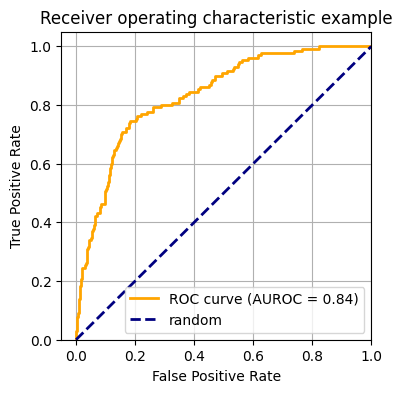

In [52]:
df = load_data()
df['prediction'] = get_predictions(df['probas'], threshold=.3)

fpr_test, tpr_test, thresholds_test, roc_auc_test = get_roc_sklearn(df['probas'], df['target'])
plt.figure(figsize=(4,4))
lw = 2
plt.plot(fpr_test, tpr_test, color='orange', lw=lw, label='ROC curve (AUROC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Congratulations! You made it to the end of another unit! You are now ready to explore more about classification and regression problems and other particularities of model training and selection.

See you in the next unit!